<a href="https://colab.research.google.com/github/Altemir1/Trading-Strategies/blob/main/kegoc_eda_mean_reversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset preparation

Merging data sets for 3 years period (14-03-2022: 13-03-2025)

In [ ]:
import pandas as pd

df_1 = pd.read_csv('/content/Download Data - STOCK_KZ_XKAZ_KEGC (2).csv') # 2022 - 2023
df_2 = pd.read_csv('/content/Download Data - STOCK_KZ_XKAZ_KEGC (1).csv') # 2023 - 2024
df_3 = pd.read_csv('/content/Download Data - STOCK_KZ_XKAZ_KEGC.csv') # 2024 - 2025

merged_df = pd.concat([df_1, df_2, df_3], ignore_index=True)
merged_df.head()

In [ ]:
merged_df.info()

Dropping same rows

In [ ]:
merged_df.drop_duplicates(inplace=True)
merged_df.info()

Converting date column into date datatype

In [ ]:
merged_df["Date"] = pd.to_datetime(merged_df["Date"])
merged_df["Date"].info()

Renaming columns for convinience of use

In [ ]:
columns_to_rename = {}

for column in merged_df.columns:
  columns_to_rename[column] = column.lower()

merged_df.rename(columns=columns_to_rename, inplace=True)

merged_df.head()

Converting numeric columns into float

In [ ]:
columns_to_convert = ["open", "high", "low", "close", "volume"]
for column in columns_to_convert:

  merged_df[column] = merged_df[column].str.replace(",", "")

  if column != "volume":
    merged_df[column] = merged_df[column].str.replace(".", "")
    merged_df[column] = merged_df[column].astype("float")
    merged_df[column] = merged_df[column]/100
  else:
    merged_df[column] = merged_df[column].astype("float")
    merged_df[column] = merged_df["close"] * merged_df[column]

merged_df.head()


Setting index according to the date fo the kegoc

In [ ]:
merged_df.reset_index(drop=True, inplace=True)
merged_df.sort_values(by="date", inplace=True)
merged_df.set_index("date", inplace=True)

In [ ]:
merged_df.head()

In [ ]:
merged_df.tail()

Saving formatted dataframe

In [ ]:
merged_df.to_csv("kegoc-stock-data-2022-2025.csv")

### EDA for KEGOC stock price

Close price vs Trading volume of the stock

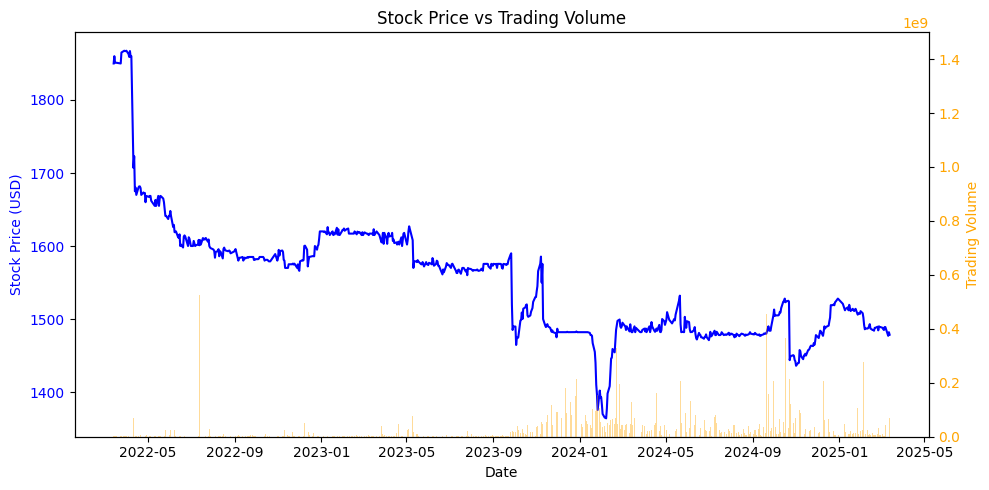

In [36]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Price on primary y-axis
ax1.plot(merged_df.index, merged_df["close"], color="blue", label="Close Price")
ax1.set_ylabel("Stock Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create a secondary y-axis for Volume
ax2 = ax1.twinx()
ax2.bar(merged_df.index, merged_df["volume"], color="orange", alpha=0.4, label="Trading Volume")
ax2.set_ylabel("Trading Volume", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Formatting x-axis
ax1.set_xlabel("Date")
ax1.set_title("Stock Price vs Trading Volume")
fig.tight_layout()

# Show the plot
plt.show()
plt.close()

Data set statistical description

In [31]:
merged_df.describe()

,open,high,low,close,volume
count,737.000000,737.000000,737.000000,737.000000,7.370000e+02
mean,1548.977205,1553.676649,1542.903569,1549.189661,3.099206e+07
std,80.753863,80.016939,79.516087,79.837880,7.420996e+07
min,1363.000000,1372.590000,1361.000000,1363.990000,2.070900e+05
25%,1482.000000,1488.000000,1481.000000,1483.000000,1.777794e+06
50%,1565.900000,1568.000000,1560.000000,1566.000000,8.653328e+06
75%,1595.700000,1600.000000,1585.010000,1597.000000,3.385534e+07
max,1867.490000,1867.490000,1855.270000,1867.490000,1.427740e+09


Volatility plot

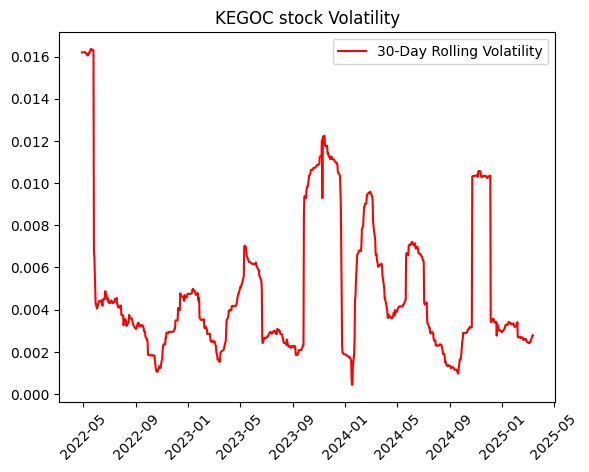

In [40]:
daily_return = merged_df["close"].pct_change()
rolling_volatility = daily_return.rolling(window=30).std()


plt.plot(rolling_volatility, label="30-Day Rolling Volatility", color="red")
plt.title("KEGOC stock Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()


### Mean reversion strategy implementation

In [38]:
import pandas as pd

df = pd.read_csv("/content/processed-kegoc-stock-data-2022-2025.csv")
df.head()

,date,open,high,low,close,volume
0,2022-03-14,1863.97,1864.0,1849.00,1850.01,3576069.33
1,2022-03-15,1851.00,1860.0,1851.00,1860.00,983940.00
2,2022-03-16,1860.00,1860.0,1849.03,1851.00,2173074.00
3,2022-03-17,1851.00,1860.0,1849.01,1851.00,1764003.00
4,2022-03-18,1851.00,1851.0,1850.00,1851.00,4172154.00


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    737 non-null    object 
 1   open    737 non-null    float64
 2   high    737 non-null    float64
 3   low     737 non-null    float64
 4   close   737 non-null    float64
 5   volume  737 non-null    float64
dtypes: float64(5), object(1)
memory usage: 34.7+ KB


In [40]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    737 non-null    datetime64[ns]
 1   open    737 non-null    float64       
 2   high    737 non-null    float64       
 3   low     737 non-null    float64       
 4   close   737 non-null    float64       
 5   volume  737 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 34.7 KB


In [41]:
df.set_index("date", inplace=True)
df.head()

,open,high,low,close,volume
date,,,,,
2022-03-14,1863.97,1864.0,1849.00,1850.01,3576069.33
2022-03-15,1851.00,1860.0,1851.00,1860.00,983940.00
2022-03-16,1860.00,1860.0,1849.03,1851.00,2173074.00
2022-03-17,1851.00,1860.0,1849.01,1851.00,1764003.00
2022-03-18,1851.00,1851.0,1850.00,1851.00,4172154.00


Function for simulation of one configuration

In [55]:


def simulate_strategy(data, window, num_std, delay_days=0):
    df = data.copy()
    df['ma'] = df['close'].rolling(window).mean()
    df['std'] = df['close'].rolling(window).std()
    df['upper'] = df['ma'] + num_std * df['std']
    df['lower'] = df['ma'] - num_std * df['std']
    df.dropna(inplace=True)

    cash = 10000
    shares = 0
    portfolio_value = []
    positions = []

    signal_wait_counter = 0
    pending_action = None  # 'buy' or 'sell'

    for date, row in df.iterrows():
        price = row['close']
        upper = row['upper']
        lower = row['lower']

        # Check for new signal only if not waiting
        if pending_action is None:
            if price < lower and shares == 0:
                pending_action = 'buy'
                signal_wait_counter = delay_days
            elif price > upper and shares > 0:
                pending_action = 'sell'
                signal_wait_counter = delay_days

        # If waiting on a signal, decrement the wait counter
        elif signal_wait_counter > 0:
            signal_wait_counter -= 1

        # Execute signal after waiting period
        elif signal_wait_counter == 0:
            if pending_action == 'buy':
                shares = cash // price
                cash -= shares * price
                positions.append(('buy', date, price))
            elif pending_action == 'sell':
                cash += shares * price
                shares = 0
                positions.append(('sell', date, price))

            pending_action = None  # Reset after execution

        total_value = cash + shares * price
        portfolio_value.append((date, total_value))

    final_value = portfolio_value[-1][1]
    return final_value, positions

Grid search for best configuration of the parameters for strategy

In [59]:
window_options = list(range(10, 50, 5))
std_options = [1.0, 1.5, 2.0, 2.5, 3.0]
delay_options = list(range(1, 5))

results = []

for window in window_options:
    for num_std in std_options:
        for delay in delay_options:
            final_value, trades = simulate_strategy(df, window, num_std, delay_days=delay)
            results.append({
                'window': window,
                'std': num_std,
                'delay': delay,
                'final_value': final_value,
                'num_trades': len(trades)
            })

In [60]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='final_value', ascending=False)

print(results_df)

     window  std  delay  final_value  num_trades
140      45  1.0      1     10990.42          23
94       30  2.5      3     10781.60          11
120      40  1.0      1     10725.38          23
34       15  2.5      3     10673.04          11
82       30  1.0      3     10663.97          25
..      ...  ...    ...          ...         ...
6        10  1.5      3      9209.40          35
1        10  1.0      2      9149.53          45
3        10  1.0      4      9057.77          43
7        10  1.5      4      9039.11          33
5        10  1.5      2      8883.11          35

[160 rows x 5 columns]


Visualization of the strategy

In [61]:
# best parameters
best_window = 45
best_std = 1.0
best_delay = 1

final_value, trades = simulate_strategy(df, best_window, best_std, delay_days=best_delay)

# Make bands and ma line for the plotting
df['ma'] = df['close'].rolling(best_window).mean()
df['std'] = df['close'].rolling(best_window).std()
df['upper'] = df['ma'] + best_std * df['std']
df['lower'] = df['ma'] - best_std * df['std']
df.dropna(inplace=True)

buy_dates = [d for action, d, price in trades if action == 'buy']
buy_prices = [price for action, d, price in trades if action == 'buy']

sell_dates = [d for action, d, price in trades if action == 'sell']
sell_prices = [price for action, d, price in trades if action == 'sell']

Plotting the trade chart

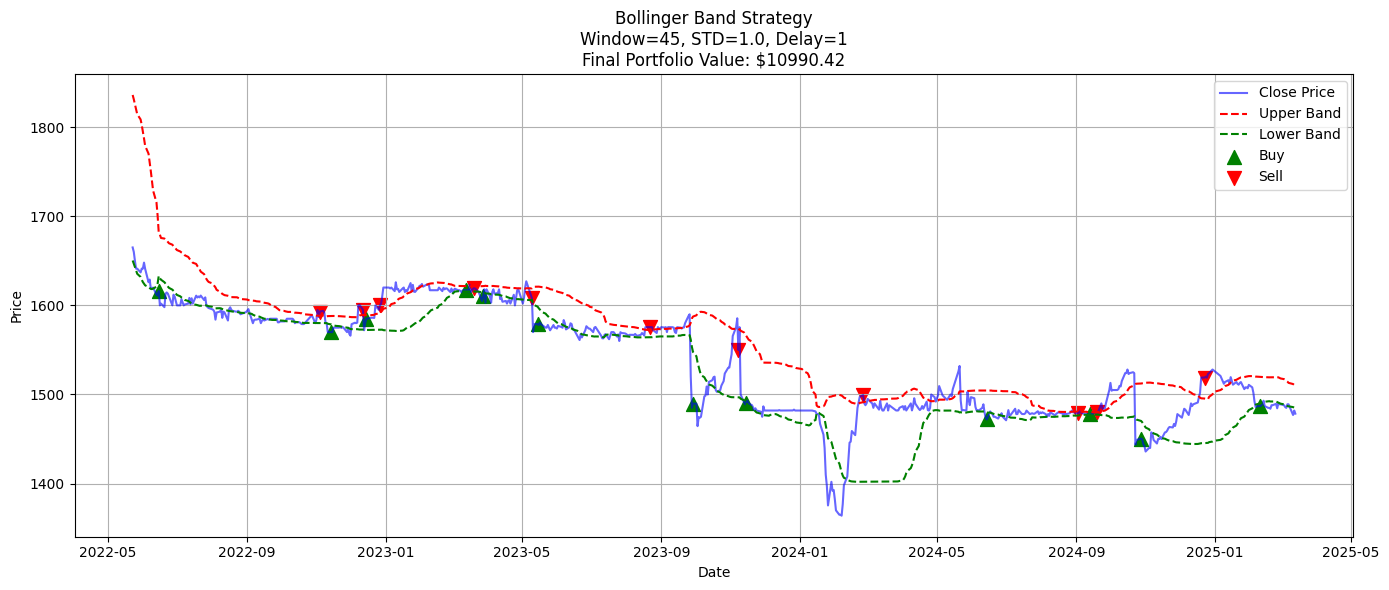

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Price and bands
plt.plot(df.index, df['close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(df.index, df['upper'], label='Upper Band', linestyle='--', color='red')
plt.plot(df.index, df['lower'], label='Lower Band', linestyle='--', color='green')

# Buy and sell markers
plt.scatter(buy_dates, buy_prices, marker='^', color='green', s=100, label='Buy')
plt.scatter(sell_dates, sell_prices, marker='v', color='red', s=100, label='Sell')

plt.title(f"Bollinger Band Strategy\nWindow={best_window}, STD={best_std}, Delay={best_delay}\nFinal Portfolio Value: ${final_value:.2f}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Hold strategy for the period

In [64]:
initial_price = df["close"].iloc[0]
final_price = df["close"].iloc[-1]

ratio = final_price/initial_price
print(f"Return of Mean reversion strategy: {((final_value/10000) * 100) - 100}%")
print(f"Return of Buy and hold strategy: {(ratio * 100) - 100}%")

Return of Mean reversion strategy: 9.90419999999996%
Return of Buy and hold strategy: -11.201801801801807%
